### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook, and the quiz questions that follow below.

Start by reading in the libraries and data.

샘플 크기가 늘어나면 작은 차이도 중요하게 보일 수 있다.    
이  점을 설명하기 위해, 이 notebook과 아래 퀴즈를 차례로 훑어보자.    
라이브러리와 데이터를 불러오는 것부터 시작하자.    

In [77]:
# 라이브러리 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# seed를 42로 설정 
np.random.seed(42)

# 데이터 불러오기
full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case imagine, we are interested in testing if the mean height of all individuals in the `full_data` is equal to 67.60 inches.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

`1.` 먼저, `full_data`에 있는 모든 사람의 키의 평균이 67.60이 맞는지 확인해본다고 가정해보자. 아래 **퀴즈1**을 활용해서 귀무가설과 대립가설을 세워보자. 

$$H_0: \mu = 67.60$$


$$H_1: \mu \neq 67.60$$

$$귀무가설(H_0) : \mu = 67.60$$

$$대립가설(H_1) : \mu \neq 67.60$$


`2.` What is the population mean?  Create a sample set of data using the below code.  What is the sample mean?  What is the standard deviation of the population?  What is the standard deviation of the sampling distribution of the mean of five draws? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. Use **quiz 2** below to assure your answers are correct.  

`2.` 모집단의 키의 평균은 어떻게 되는가? 아래 코드를 이용하여 샘플을 만들어보자. 샘플의 평균은 얼마인가? 모집단의 표준편차는 어떻게 되는가? 5개 샘플 평균의 표준편차는 어떻게 되는가? 5개의 샘플 데이터의 평균을 이용하여 히스토그램을 그려 모양을 확인해보자. 아래 **퀴즈2**를 이용하여 정답이 맞는지 확인해보자. 

In [78]:
# 5개 샘플 추출 
sample1 = full_data.sample(5, random_state=63)
sample1

,user_id,age,drinks_coffee,height
17,2132,>=21,True,68.641324
1511,4053,>=21,True,65.285809
1486,2696,>=21,True,69.750091
1487,7411,<21,False,57.030660
664,4353,>=21,True,73.150824


In [79]:
# 모집단 키의 평균값 
full_data.height.mean() # Population mean

67.597486973079342

In [80]:
# 샘플링한 5개 값의 평균값
sample1.height.mean() # Sample mean

66.771741713286985

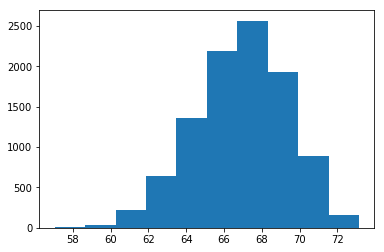

In [81]:
# 샘플링 분포(표본분포)
sampling_dist_mean5 = []

for _ in range(10000):
    sample_of_5 = sample1.sample(5, replace = True)
    sample_mean = sample_of_5.height.mean()
    sampling_dist_mean5.append(sample_mean)
    
plt.hist(sampling_dist_mean5);

In [82]:
# 샘플링 분포의 표준편차
std_sampling_dist = np.std(sampling_dist_mean5)
std_sampling_dist# the standard deviation of the sampling distribution

2.4563176744680253

`3.` Using your null and alternative hypotheses as set up in question 1 and the results of your sampling distribution in question 2, simulate values of the mean values that you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.


`3.` . 1번에서 세운 귀무가설과 대립가설, 그리고 2번의 샘플링 분포를 활용하여, 귀무가설의 평균값을 찾아내보자. 귀무가설 및 대립가설에 대한 결정을 내리기 위해 이 평균값을 이용해 p-value를 확인해보자. **퀴즈3**과 **퀴즈4**를 이용해 정답을 확인해보자. 

**Hint:** Numpy 공식문서 확인(numpy.random.normal) [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html)


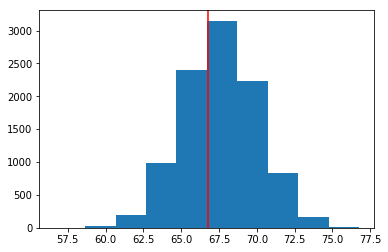

In [83]:
# 귀무가설의 평균값 
null_mean = 67.60

# 귀무가설 값들 
null_vals = np.random.normal(null_mean, std_sampling_dist, 10000)

# 히스토그램 
plt.hist(null_vals);
# 표본의 평균값 표시 
plt.axvline(x=sample1.height.mean(), color = 'red'); # where our sample mean falls on null dist

In [96]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
# 양측 검정의 경우, 귀무가설의 양측 방향으로 좀더 극단적인 값이 있는지를 확인하려고 한다. 

# 샘플의 평균 키
obs_mean = sample1.height.mean()

# probability of a statistic higher than observed
# 하한선보다 작은 값들의 평균 
prob_more_extreme_high = (null_vals > obs_mean).mean()
    
# probability a statistic is more extreme lower
# 상한선보다 큰 값들의 평균 
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_vals).mean()

# 위의 두 확률을 더해서 p-value를 구함
pval = prob_more_extreme_low + prob_more_extreme_high
pval

2.0

In [97]:
obs_mean

66.771741713286985

**The above shows a second possible method for obtaining the p-value.  These are pretty different, stability of these values with such a small sample size is an issue. We are essentially shading outside the lines below.**

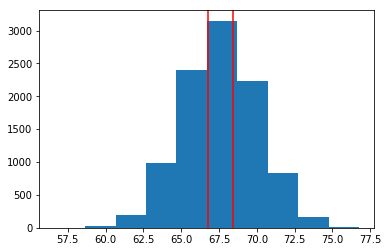

In [86]:
# 상한선 = 샘플에서 관찰된 평균값 
upper_bound = obs_mean
# 하한선 = (모집단 평균) - (샘플 평균 - 모집단 평균)
lower_bound = null_mean - (obs_mean - null_mean)

# 히스토그램 + 상한선,하한선 표시 
plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [87]:
# 상한선, 하한선
print(upper_bound, lower_bound)

66.7717417133 68.4282582867


`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.


`4.` 이제 질문1과 마찬가지로 동일한 샘플의 평균이지만, 실제로 300개의 샘플로부터 얻은 평균이라고 생각해보자. 300개 값의 평균으로 구성된 샘플링 분포에서 표준편차는 어떻게 될까? 그리고, 귀무가설과 대립가설을 선택하는 기준이 되는 p-value 값은 어떻게 될까? 300개 값의 평균으로 구성된 샘플링 분포를 만들고 히스토그램의 모양을 확인해보자. 아래 맨 마지막에서 2번째 질문에 대한 답을 찾아보자. 

In [98]:
# 300개 값으로 이뤄진 샘플2
sample2 = full_data.sample(300, random_state=63)

# 샘플2에서 얻어진 키의 평균값
# obs_mean = sample2.height.mean()
# obs_mean

In [99]:
# 300개 값으로 샘플링 분포 만들기 
sampling_dist_mean300 = []

for _ in range(10000):
    sample_of_300 = sample2.sample(300, replace = True)
    sample_mean = sample_of_300.height.mean()
    sampling_dist_mean300.append(sample_mean)
    
# 샘플링 분포의 표준편차     
std_sampling_dist300 = np.std(sampling_dist_mean300)    
# 샘플링 분포의 표준편차를 이용해 귀무가설 값을 생성 
null_vals = np.random.normal(null_mean, std_sampling_dist300, 10000)

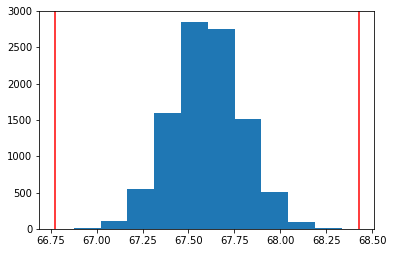

In [100]:
# 상한선 = 샘플로부터 얻어진 평균값
upper_bound = obs_mean
# 하한선 = 귀무가설의 평균 - (샘플의 평균 - 귀무가설의 평균)
lower_bound = null_mean - (obs_mean - null_mean)

# 히스토그램 + 상한선,하한선 표시 
plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [101]:
upper_bound, lower_bound

(66.771741713286985, 68.428258286713003)

In [102]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
# 양측 검정의 경우, 귀무가설의 양측 방향으로 좀더 극단적인 값이 있는지를 확인하려고 한다. 

# probability of a statistic lower than observed
# 하한선보다 작은 값들의 평균 
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
# 상한선보다 큰 값들의 평균 
prob_more_extreme_high = (upper_bound < null_vals).mean()

# p-value 
pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super
      # close will be significant at an alpha = 0.1 level.

2.0

`5.` Reflect on what happened by answering the final quiz in this concept.

**Even with a very small difference between a sample mean and a hypothesized population mean, the difference will end up being significant with a very large sample size.**

In [114]:
sample1 = full_data.sample(5, replace=True, random_state=56)
sample2 = full_data.sample(300, replace=True, random_state=56)

In [115]:
sample1.height.mean(), sample2.height.mean()

(66.808012431336891, 67.889682017071422)